In [100]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

from tmu.models.autoencoder.autoencoder import TMAutoEncoder

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [101]:
def load_test_dataset(farm, event_id):
    X = np.loadtxt(f"./data_test/X_{farm}_{event_id}_10b.txt", dtype=np.uint32)
    X = np.array(X).astype(np.uint32)
    return X


def load_train_dataset(farm, event_id):
    X = np.loadtxt(f"./data_train/X_{farm}_{event_id}_10b.txt", dtype=np.uint32)
    X = np.array(X).astype(np.uint32)
    return X


def load_test_labels(farm, event_id):
    y = np.loadtxt(f"./data_test/y_{farm}_{event_id}_10b.txt", dtype=np.uint32)
    y = np.array(y).astype(np.uint32)
    return y


def load_train_labels(farm, event_id):
    y = np.loadtxt(f"./data_train/y_{farm}_{event_id}_10b.txt", dtype=np.uint32)
    y = np.array(y).astype(np.uint32)
    return y

In [102]:
def load_model(filename) -> TMAutoEncoder:
    with open(filename, "rb") as f:
        model = pickle.load(f)

    return model

In [103]:
def calculate_accuracy(labels, predictions):
    # g = the ground truth of all data points with a normal status-ID within the prediction time frame
    g = labels

    # p = the corresponding prediction of an AD-model.
    p = predictions

    # Calculate the accuracy
    fp = np.sum((p == 1) & (g == 0))

    # the number of true negatives based on g and p
    tn = np.sum((p == 0) & (g == 0))

    accuracy = tn / (fp + tn)

    return accuracy

In [104]:
def plot_mse(X, pred, name, threshold):
    # Compute MSE for each row
    mse_per_row = np.mean((pred - X) ** 2, axis=1)

    # Plot SNS plot of all MSE values
    plt.figure(figsize=(8, 4))
    sns.histplot(mse_per_row, bins=50, kde=True, color='b')

    # Add a threshold line
    plt.axvline(threshold, color='r', linestyle='--')

    # Save the plot
    plt.savefig(f"./plot_mse_hist_{name}.png")


def run_test(X, y, name):
    print(f"Experiment: {name}")
    print(f"Rows: {len(X)}, Columns: {len(X[0])}")

    tm = load_model("latest3.pkl")

    pred = tm.predict(X)

    mse = np.mean((pred - X) ** 2)
    print(f"Mean MSE: {mse}")

    threshold = 0.625

    # For each row in pred, if the MSE is greater than the threshold, then it is an anomaly
    X_predictions = np.array([1 if np.mean((pred[i] - X[i]) ** 2) > threshold else 0 for i in range(len(X))])

    # Accuracy
    accuracy = calculate_accuracy(y, X_predictions)

    print(f"Accuracy: {accuracy}")

    plot_mse(X, pred, name, threshold=0.62)

In [105]:
X_train = load_train_dataset("C", 49)
y_train = load_train_labels("C", 49)

X_test = load_test_dataset("C", 49)
y_test = load_test_labels("C", 49)

Experiment: 49_train
Rows: 46522, Columns: 9540
Mean MSE: 0.5683937501853229
Accuracy: 0.9970981471131938
Experiment: 49_test
Rows: 1606, Columns: 9540
Mean MSE: 0.5864442434163293
Accuracy: 0.5674603174603174


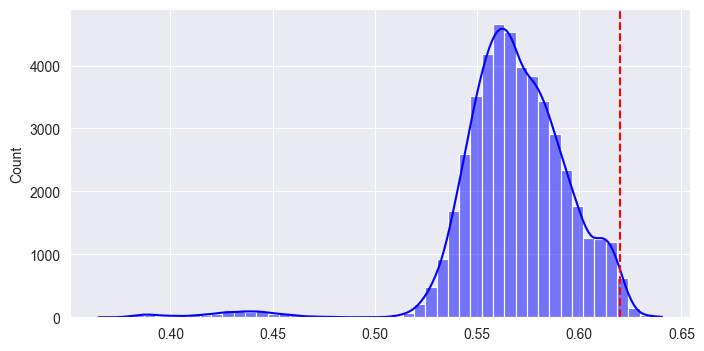

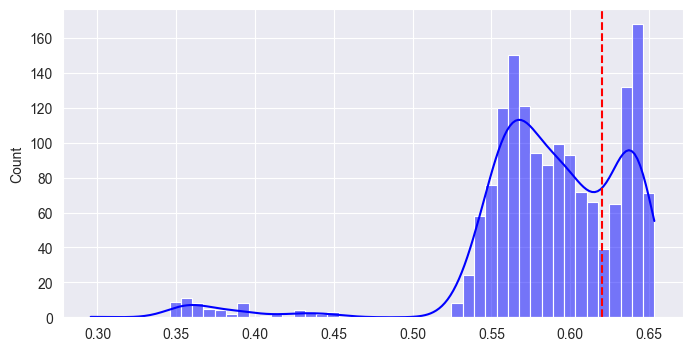

In [106]:
run_test(X_train, y_train, "49_train")
run_test(X_test, y_test, "49_test")